In [114]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)



In [115]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12,family = "Comic Sans MS")
        sns.boxplot(y = df[var],color='m',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='m',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [116]:
cardio=pd.read_csv('/content/CardioGoodFitness.csv')
cardio.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [117]:
cardio.shape

(180, 9)

In [118]:
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [119]:
cardio['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [120]:
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [121]:
cardio.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [122]:
cardio['Product'].nunique()

3

In [123]:
cardio['Gender'].nunique

<bound method IndexOpsMixin.nunique of 0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
175      Male
176      Male
177      Male
178      Male
179      Male
Name: Gender, Length: 180, dtype: object>

In [124]:
cardio['Age'].nunique

<bound method IndexOpsMixin.nunique of 0      18
1      19
2      19
3      19
4      20
       ..
175    40
176    42
177    45
178    47
179    48
Name: Age, Length: 180, dtype: int64>

In [125]:
cardio['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [126]:
cardio['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [127]:
cardio['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [128]:
cardio['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [129]:
cardio['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [130]:
cardio['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [131]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [132]:
cardio['Gender']=cardio['Gender'].astype("category")
cardio['Product']=cardio['Product'].astype("category")
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype("category")

In [133]:
cardio=cardio.drop_duplicates()

In [134]:
bins=[14,20,30,40,60]
labels=["teens",'20s','30s','above 40s']
cardio['Age_group']=pd.cut(cardio['Age'],bins)
cardio['Agecategory']=pd.cut(cardio['Age'],bins,labels=labels)
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Agecategory
0,TM195,18,Male,14,Single,3,4,29562,112,"(14, 20]",teens
1,TM195,19,Male,15,Single,2,3,31836,75,"(14, 20]",teens
2,TM195,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",teens
3,TM195,19,Male,12,Single,3,3,32973,85,"(14, 20]",teens
4,TM195,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",teens


In [135]:
bins_slab=[29000,35000,60000,85000,105000]
labels=['low income','middle income','upper-middle income','high income']
cardio['IncomeSlab'] = pd.cut(cardio['Income'],bins_slab,labels = labels)
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Agecategory,IncomeSlab
0,TM195,18,Male,14,Single,3,4,29562,112,"(14, 20]",teens,low income
1,TM195,19,Male,15,Single,2,3,31836,75,"(14, 20]",teens,low income
2,TM195,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",teens,low income
3,TM195,19,Male,12,Single,3,3,32973,85,"(14, 20]",teens,low income
4,TM195,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",teens,middle income


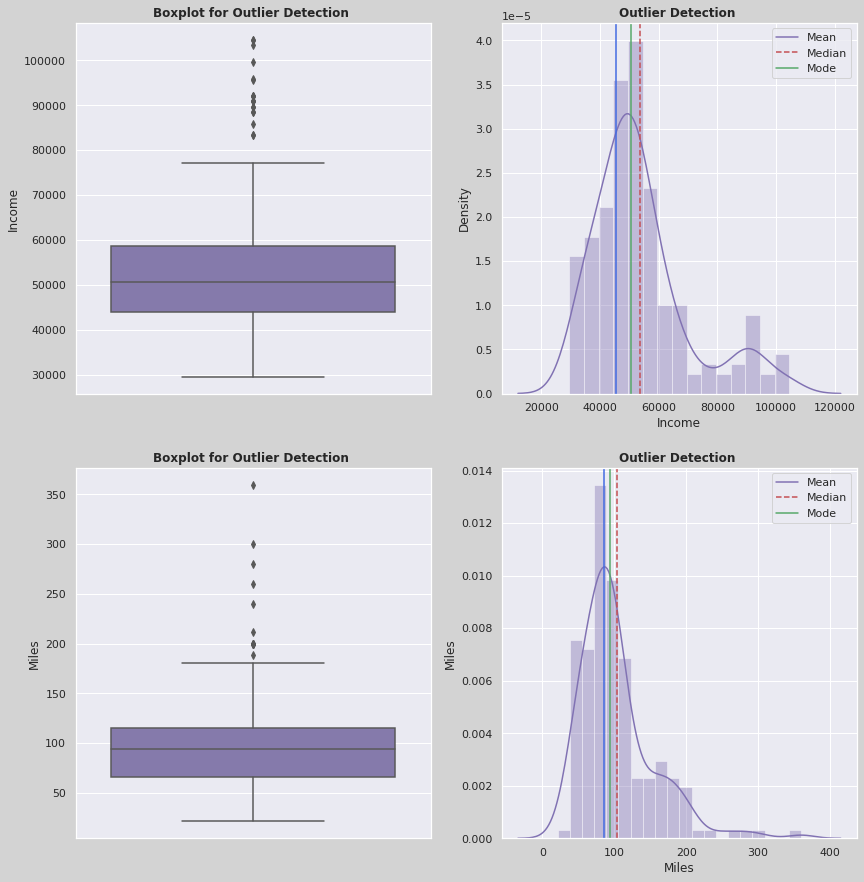

In [136]:
col_num=['Income','Miles']
outlier_detect(cardio,col_num,2,2,14,15)

In [137]:
cardio1=cardio.copy()

In [138]:
q3=cardio1['Income'].quantile(0.75)
q1=cardio1['Income'].quantile(0.25)
IQR=q3-q1
cardio1 = cardio1[(cardio1['Income'] > q1 - 1.5*IQR) & (cardio1['Income'] < q3 + 1.5*IQR)]
plt.show()


In [139]:
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_group', 'Agecategory', 'IncomeSlab'],
      dtype='object')

In [140]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()

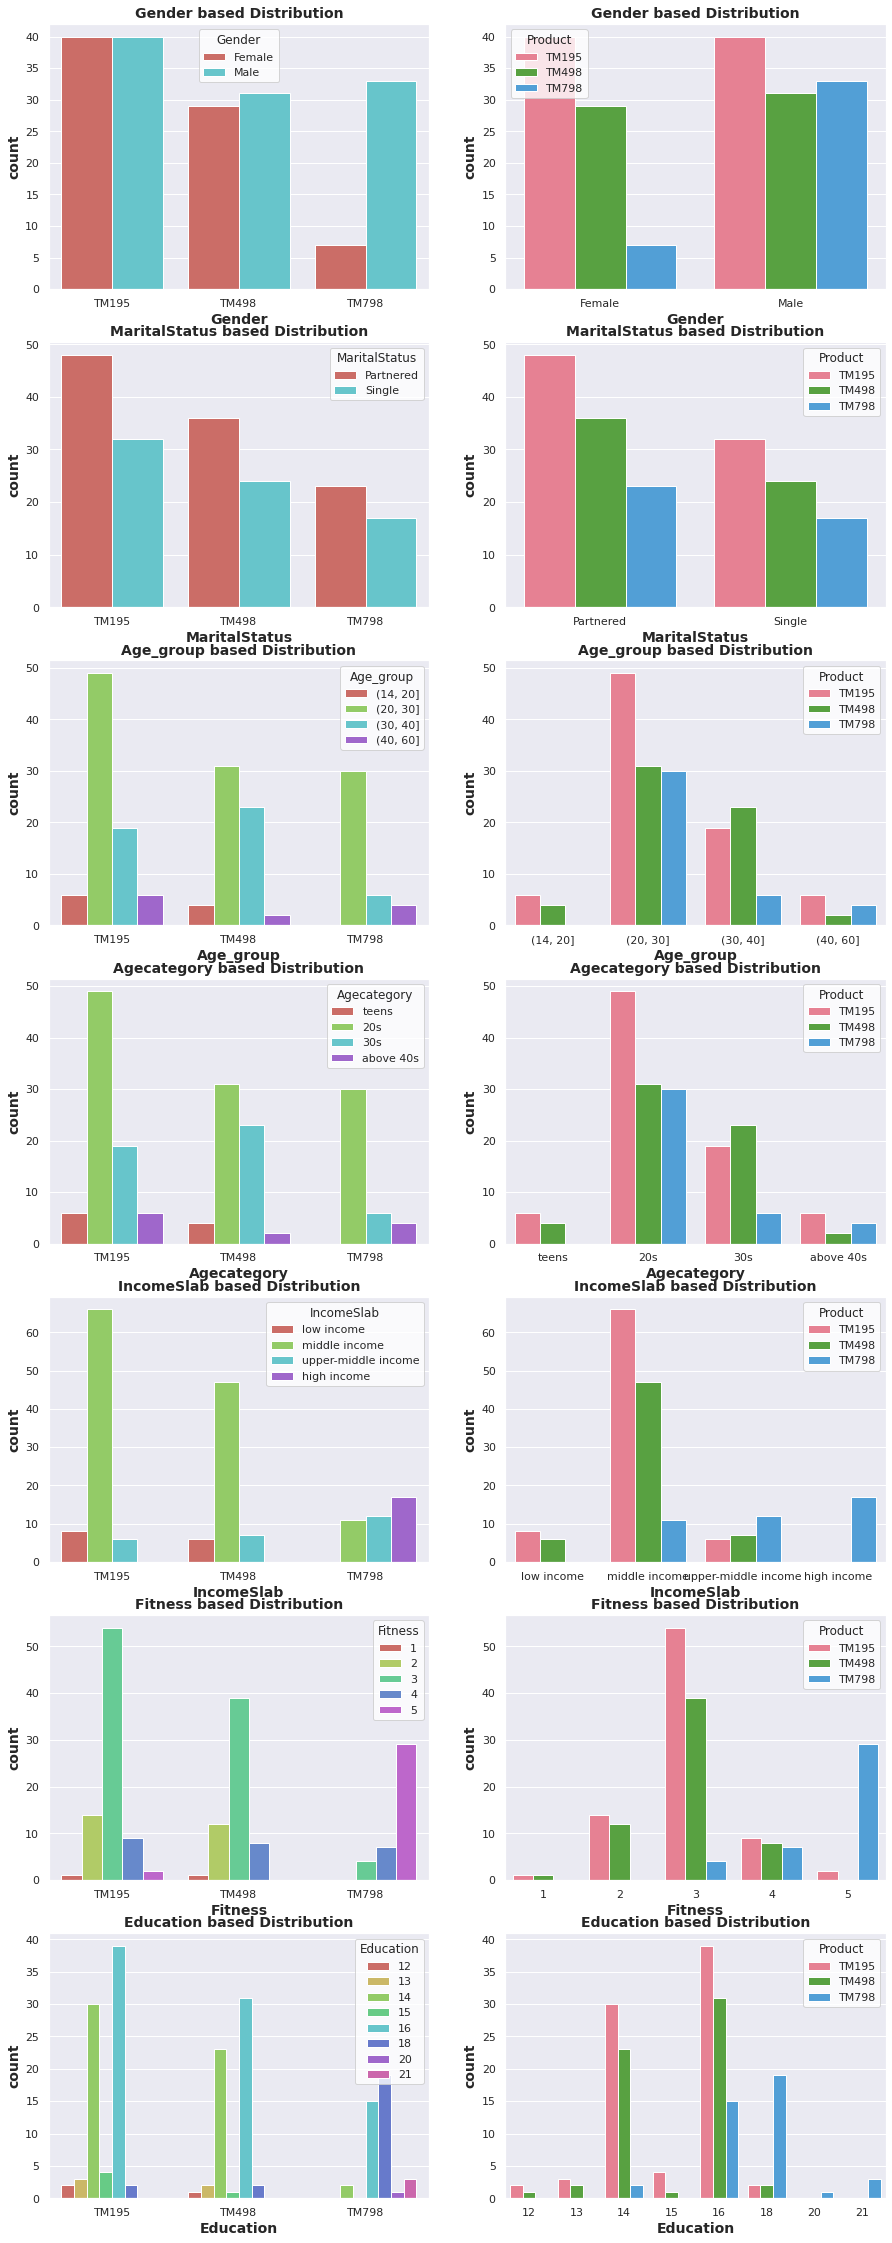

In [141]:
col_names = ['Gender', 'MaritalStatus', 'Age_group', 'Agecategory','IncomeSlab','Fitness','Education']

cat_bi_analysis(cardio,col_names,'Product',7,2,15,40)

In [142]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

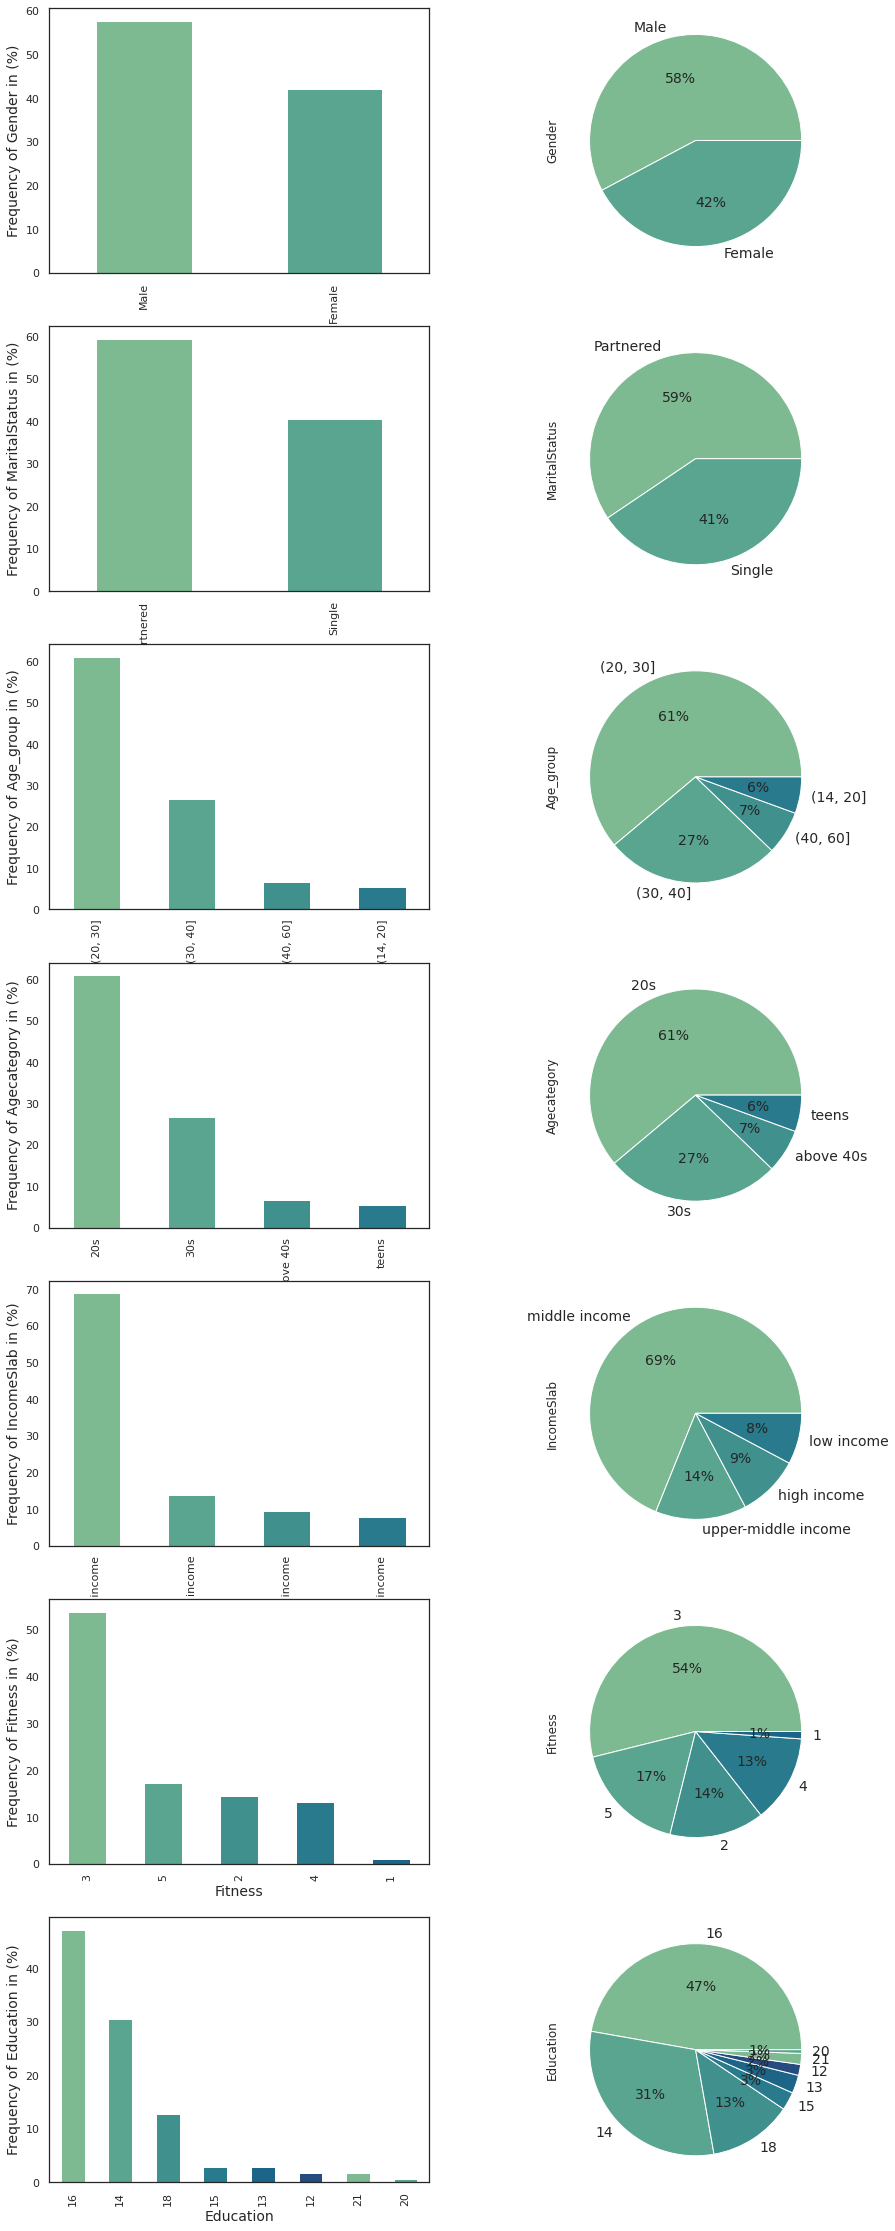

In [143]:
col_names = ['Gender', 'MaritalStatus', 'Age_group', 'Agecategory','IncomeSlab','Fitness','Education']

cat_analysis(cardio,col_names,7,2,15,40)

In [144]:
def num_mult_analysis(df,colname,category,groupby,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1]) 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

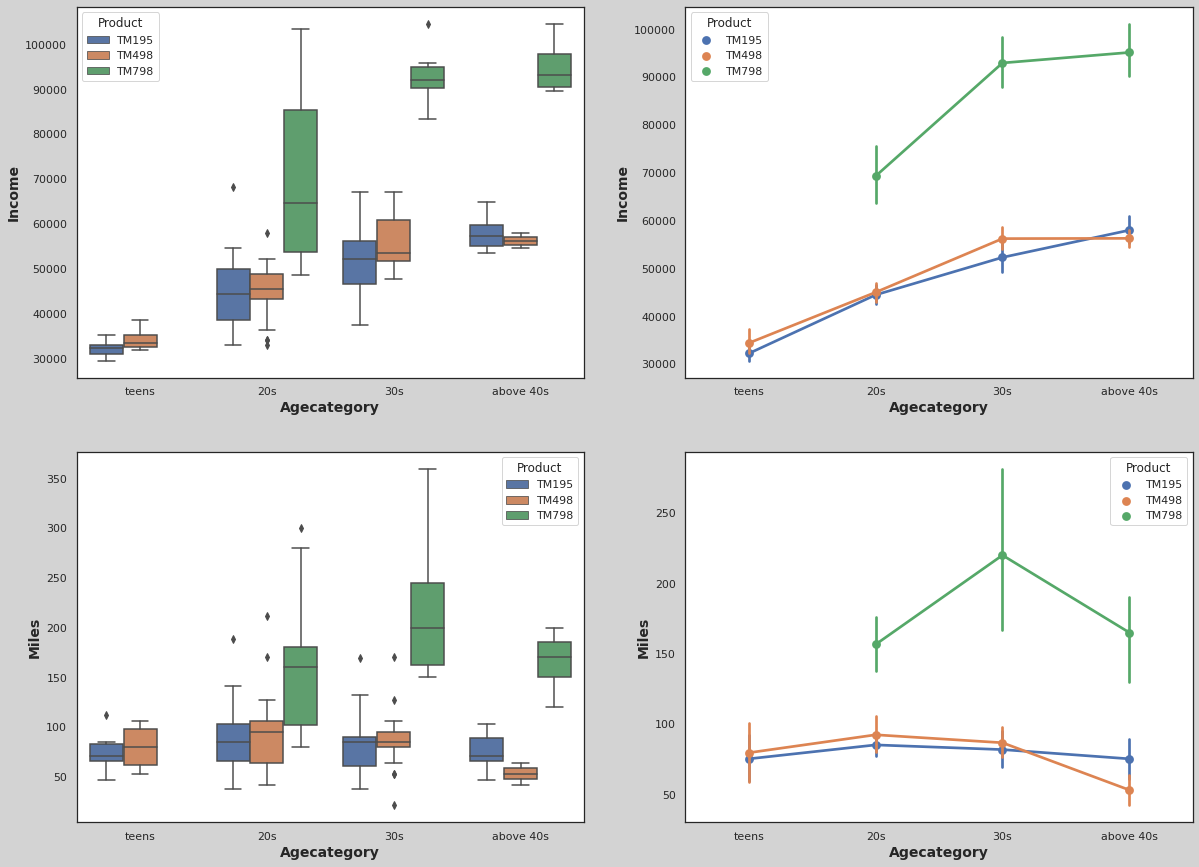

In [145]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(cardio,col_num,'Agecategory','Product')

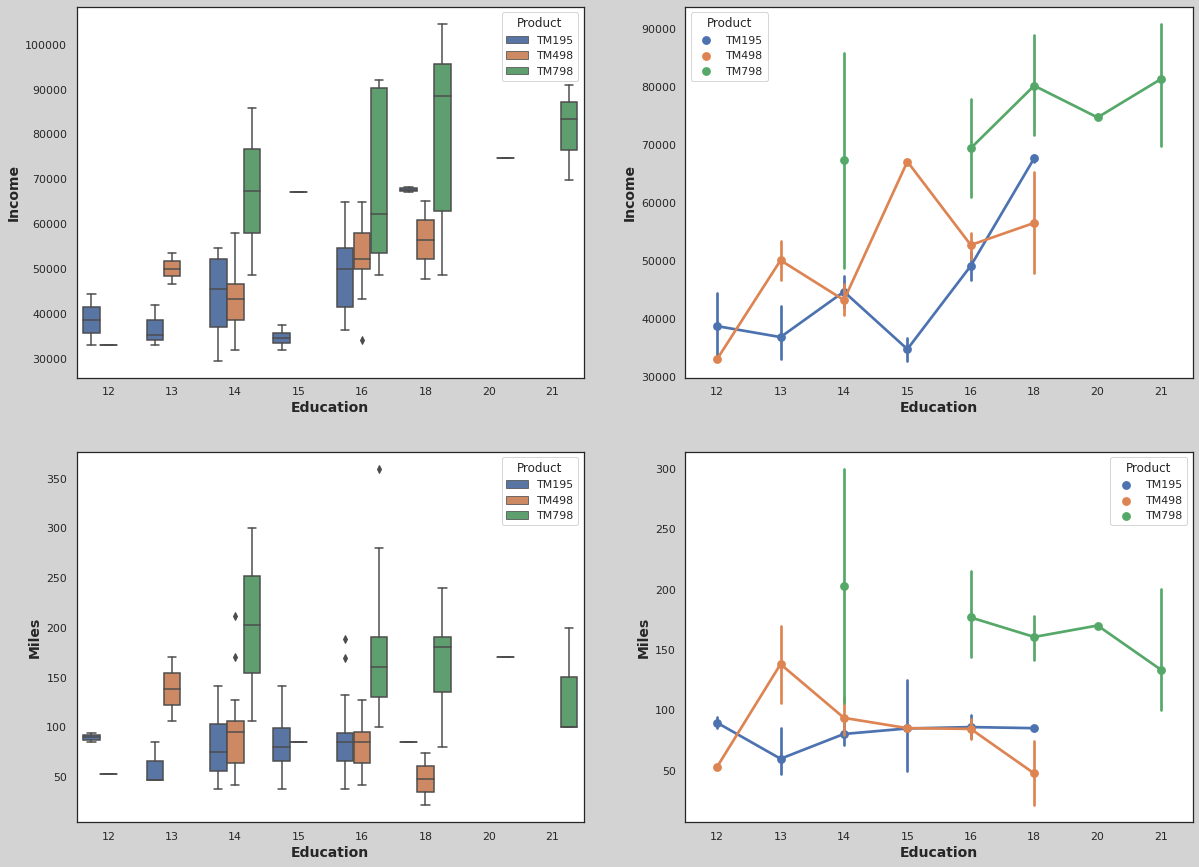

In [146]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(cardio,col_num,"Education","Product")

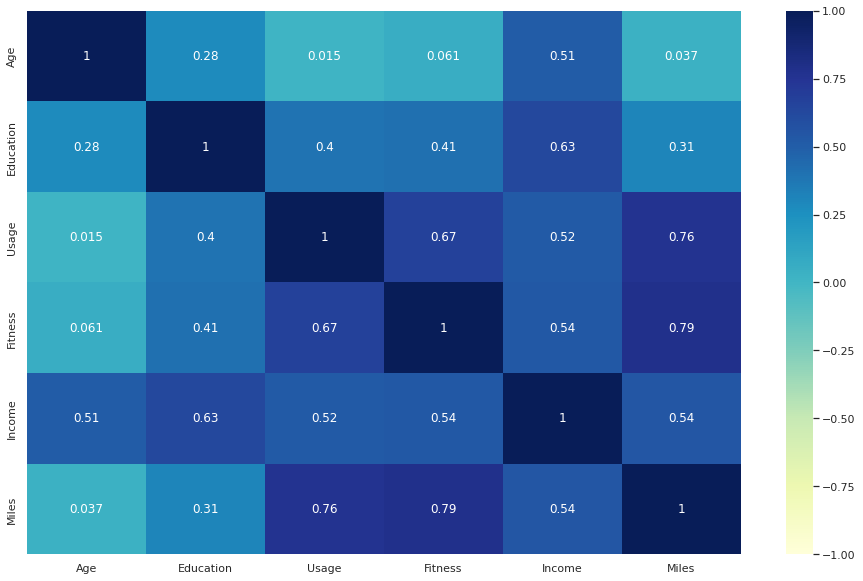

In [147]:
plt.figure(figsize = (16, 10))
sns.heatmap(cardio.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

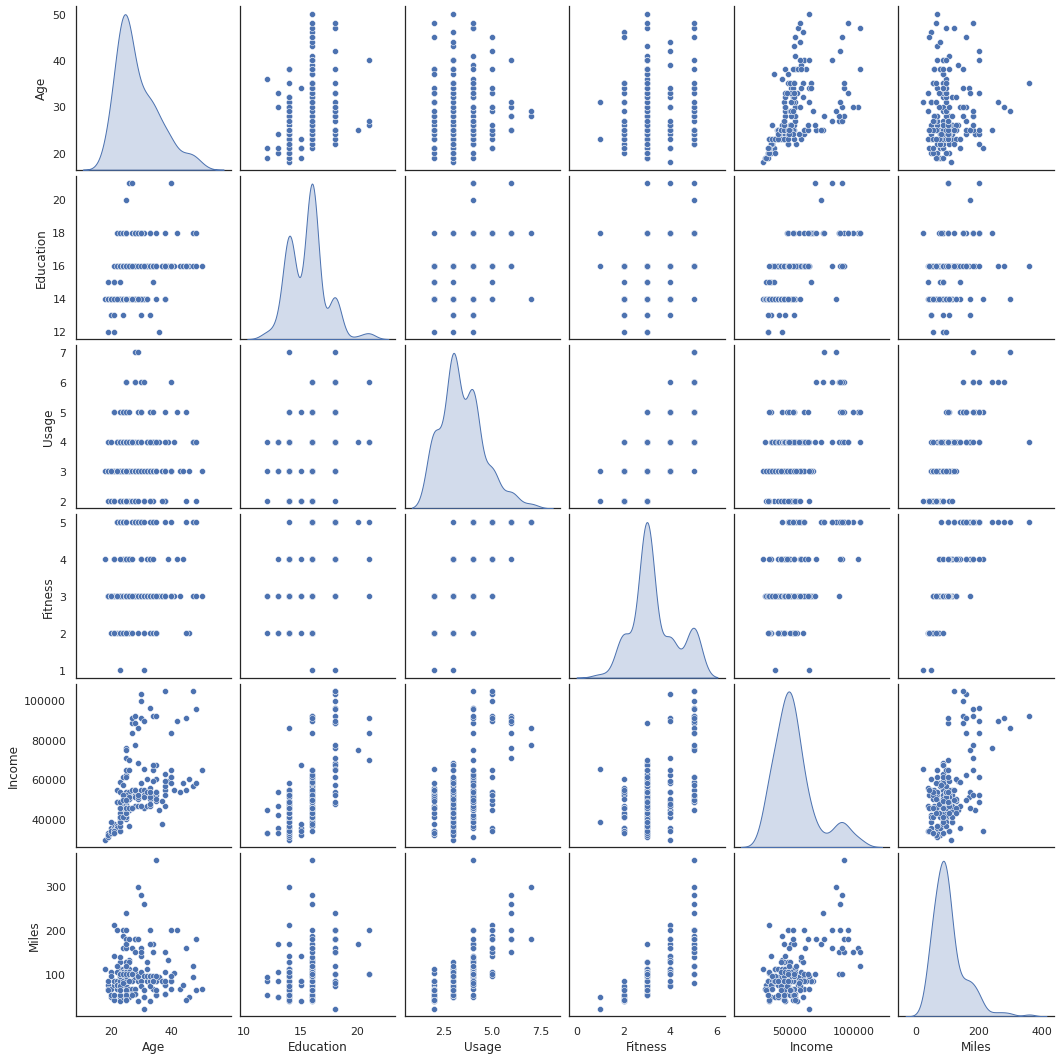

In [148]:
sns.pairplot(cardio,diag_kind='kde');

In [151]:
pd.crosstab(index=cardio['Product'],columns=cardio['IncomeSlab'],margins='True')

IncomeSlab,low income,middle income,upper-middle income,high income,All
Product,,,,,
TM195,8,66,6,0,80
TM498,6,47,7,0,60
TM798,0,11,12,17,40
All,14,124,25,17,180


In [153]:
round(14/180,2)*100

8.0

In [154]:
round(17/189,4)*100

8.99

In [155]:
round(17/17,2)*100

100.0

In [156]:
pd.crosstab(index=cardio['Product'],columns=cardio['Gender'],margins='True')

Gender,Female,Male,All
Product,,,
TM195,40,40,80
TM498,29,31,60
TM798,7,33,40
All,76,104,180


In [157]:
#prob of buying tm798 by male
round(33/180,2)*100

18.0